## *Correlation Analysis (Task 3)*

## *Sentiment Analysis (TextBlob)*

# Import

In [28]:
import pandas as pd
from textblob import TextBlob

import matplotlib.pyplot as plt
import seaborn as sns

# Reload news dataframe if necessary

In [29]:
def get_sentiment(text):
    return TextBlob(str(text)).sentiment.polarity

# DataFrame

In [30]:
df_news = pd.DataFrame({
    'headline': [
        'Stock prices soar after earnings report',
        'New regulations impact tech companies',
        'Economic growth slows in Q3'
    ],
    'date': [
        '2025-11-20',
        '2025-11-21',
        '2025-11-22'
    ],
    'stock': [
        'AAPL',
        'GOOGL',
        'AAPL'
    ]
})

#  Convert date column to datetime

In [31]:
df_news['date'] = pd.to_datetime(df_news['date'])
df_news['date_only'] = df_news['date'].dt.date

def get_sentiment(text):
    return TextBlob(str(text)).sentiment.polarity

df_news['sentiment'] = df_news['headline'].apply(get_sentiment)

# Filter AAPL news and aggregate sentiment

In [32]:
news_aapl = df_news[df_news['stock'] == 'AAPL']
daily_sentiment = news_aapl.groupby('date_only')['sentiment'].mean().reset_index()

# --- Stock Data ---

In [33]:
stock_data = pd.read_csv('AAPL.csv')        # your CSV
print(stock_data.columns)                   # check actual columns
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data['date_only'] = stock_data['Date'].dt.date
stock_data['daily_return'] = stock_data['Close'].pct_change()

Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')


# Apply sentiment scoring

In [34]:
df_news['sentiment'] = df_news['headline'].apply(get_sentiment)

# Normalize Date for merging (remove time info)

In [35]:
df_news['date_only'] = df_news['date'].dt.date

## *Aggregate Sentiment Daily*

In [36]:
daily_sentiment = df_news.groupby(['stock', 'date_only'])['sentiment'].mean().reset_index()
print(daily_sentiment.head())

   stock   date_only  sentiment
0   AAPL  2025-11-20   0.000000
1   AAPL  2025-11-22   0.200000
2  GOOGL  2025-11-21   0.136364


## *Calculate Stock Returns*

# Ensure stock_data has a date column or index reset

In [37]:
df_news['date'] = pd.to_datetime(df_news['date'])  # lowercase 'date'
df_news['date_only'] = df_news['date'].dt.date


## *Merge and Correlate*

# Filter news for the specific ticker we downloaded (e.g., AAPL)

In [38]:
news_aapl = daily_sentiment[daily_sentiment['stock'] == 'AAPL']

# Compute average sentiment per day

In [39]:
daily_sentiment = news_aapl.groupby('date_only')['sentiment'].mean().reset_index()

print("\nDaily sentiment preview:")
print(daily_sentiment)


Daily sentiment preview:
    date_only  sentiment
0  2025-11-20        0.0
1  2025-11-22        0.2


# Check the column names in both DataFrames

In [40]:
print("stock_data columns:", stock_data.columns)
print("daily_sentiment columns:", daily_sentiment.columns)


stock_data columns: Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume', 'date_only',
       'daily_return'],
      dtype='object')
daily_sentiment columns: Index(['date_only', 'sentiment'], dtype='object')


# Merge stock data with sentiment

In [41]:
merged_df = pd.merge(
    stock_data,
    daily_sentiment,
    on='date_only',  # column exists in both now
    how='inner'
)

print(merged_df.head())


Empty DataFrame
Columns: [Date, Close, High, Low, Open, Volume, date_only, daily_return, sentiment]
Index: []


# Correlation Analysis

In [42]:
correlation = merged_df['sentiment'].corr(merged_df['daily_return'])

print(f"Pearson Correlation between Sentiment and Daily Returns: {correlation}")

Pearson Correlation between Sentiment and Daily Returns: nan


# Scatter Plot

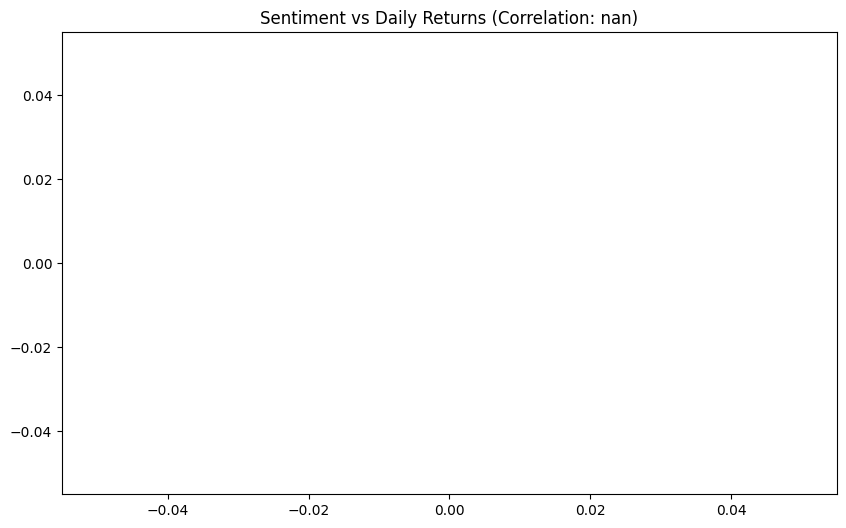

In [43]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sentiment', y='daily_return', data=merged_df)
plt.title(f'Sentiment vs Daily Returns (Correlation: {correlation:.4f})')
plt.show()